# python matplotlib jupyter
matplotlib 是 python 的 著名数据可视化工具包

## 2D图表
Matplotlib中最基础的模块是pyplot。

In [1]:
%matplotlib inline

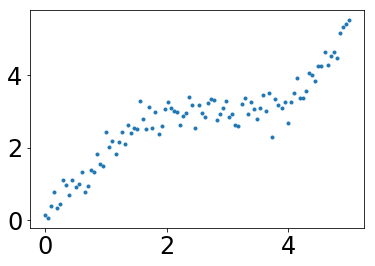

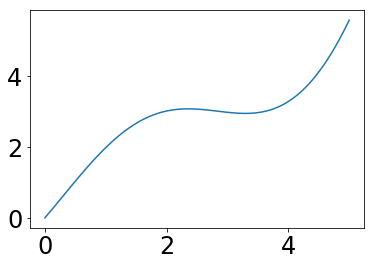

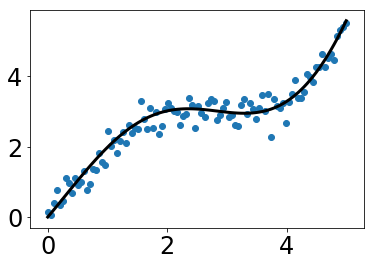

In [1]:
# 有一组数据，还有一个拟合模型，通过下面的代码图来可视化
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 通过rcParams设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

np.random.seed(42)
# x 轴的采样点
x = np.linspace(0, 5, 100)
# 通过下面曲线加上噪声生成数据，所以拟合模型就用y了……
y = 2*np.sin(x) + 0.3*x**2
y_data = y + np.random.normal(scale=0.3, size=100)

# figure() 指定图表名称
plt.figure('data')

# '.'标明画散点图，每个散点的形状是个圆
plt.plot(x, y_data, '.')

# 画模型的图，plot函数默认画连线图
plt.figure('model')
plt.plot(x, y)

# 两个图画一起
plt.figure('data & model')

# 通过'k'指定线的颜色，lw指定线的宽度
# 第三个参数除了颜色也可以指定线形，比如'r--'表示红色虚线
# 更多属性可以参考官网：http://matplotlib.org/api/pyplot_api.html
plt.plot(x, y, 'k', lw=3)

# scatter可以更容易地生成散点图
plt.scatter(x, y_data)

# 将当前figure的图保存到文件result.png
plt.savefig('result.png')

plt.show()



点和线图表只是最基本的用法，有的时候我们获取了分组数据要做对比，柱状或饼状类型的图

平时画图蹦出的一个窗口，这叫一个figure。Figure相当于一个大的画布，在每个figure中，又可以存在多个子图，这种子图叫做axes。

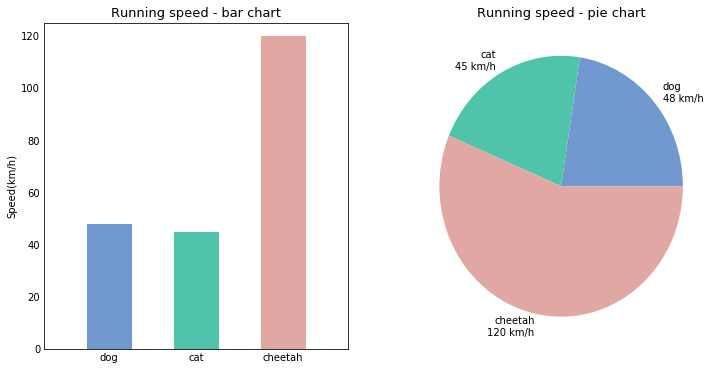

In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# 全都是设置字的大小
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

# 包含了狗，猫和猎豹的最高奔跑速度，还有对应的可视化颜色
speed_map = {
  'dog': (48, '#7199cf'),
  'cat': (45, '#4fc4aa'),
  'cheetah': (120, '#e1a7a2')
}

# 整体图的标题
fig = plt.figure('Bar chart & Pie chart', figsize=(12,6))

# 在整张图上加入一个子图，121的意思是在一个1行2列的子图中的第一张
ax = fig.add_subplot(121)
ax.set_title('Running speed - bar chart')

# 生成x轴每个元素的位置
xticks = np.arange(3)

# 定义柱状图每个柱的宽度
bar_width = 0.5

# 动物名称
animals = speed_map.keys()

# 奔跑速度
speeds = [x[0] for x in speed_map.values()]

# 对应颜色
colors = [x[1] for x in speed_map.values()]

# 画柱状图，横轴是动物标签的位置，纵轴是速度，定义柱的宽度，同时设置柱的边缘为透明
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')

# 设置y轴的标题
ax.set_ylabel('Speed(km/h)')

# x轴每个标签的具体位置，设置为每个柱的中央
ax.set_xticks(xticks)

# 设置每个标签的名字
ax.set_xticklabels(animals)

# 设置x轴的范围 ---轴不变, 在轴上显示多少, 直接决定柱子好不好看
ax.set_xlim([bar_width/2-1, 3-bar_width/2])

# 设置y轴的范围
ax.set_ylim([0, 125])

# 给每个bar分配指定的颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)
    
# 在122位置加入新的图
ax = fig.add_subplot(122)
ax.set_title('Running speed - pie chart')

# 生成同时包含名称和速度的标签
labels = ['{}\n{} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]

# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)

plt.show()

## 3D 图表

Matplotlib中也能支持一些基础的3D图表，比如曲面图，散点图和柱状图。这些3D图表需要使用mpl_toolkits模块
> python2 python3 原来1/2（两个整数相除）结果是0，现在是0.5了
python 2.2+ 以上都可以使用 from __future__ import division 实现改特性, 同时注意 // 取代了之前的 / 运算

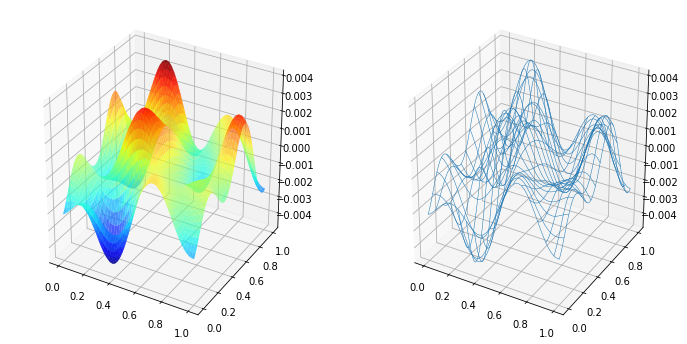

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 3D图标必须的模块，project='3d'的定义
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
n_grids = 51        # x-y平面的格点数 
c = n_grids//2    	# 中心位置
nf = 2             	# 低频成分的个数

# 生成格点
x = np.linspace(0, 1, n_grids)
y = np.linspace(0, 1, n_grids)

# x和y是长度为n_grids的array
# meshgrid会把x和y组合成n_grids*n_grids的array，X和Y对应位置就是所有格点的坐标
X, Y = np.meshgrid(x, y)

# 生成一个0值的傅里叶谱
spectrum = np.zeros((n_grids, n_grids), dtype=np.complex)

# 生成一段噪音，长度是(2*nf+1)**2/2
#noise = [np.complex(x, y) for x, y in np.random.uniform(-1, 1, ((2*nf+1)**2/2, 2))]
noise = [np.complex(x, y) for x, y in np.random.uniform(-1,1,((2*nf+1)**2//2, 2))]

# 傅里叶频谱的每一项和其共轭关于中心对称
noise_block = np.concatenate((noise, [0j], np.conjugate(noise[::-1])))

# 将生成的频谱作为低频成分
spectrum[c-nf:(c+nf+1), c-nf:c+nf+1] = noise_block.reshape((2*nf+1, 2*nf+1))

# 进行反傅里叶变换
Z = np.real(np.fft.ifft2(np.fft.ifftshift(spectrum)))

# 创建图表
fig = plt.figure('3D surface & wire', figsize=(12, 6))

# 第一个子图，surface图
ax = fig.add_subplot(121, projection='3d')

# alpha定义透明度，cmap是color map
# rstride和cstride是两个方向上的采样，越小越精细，lw是线宽
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='jet', rstride=1, cstride=1, lw=0)

# 第二个子图，网线图
ax = fig.add_subplot(122, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)

plt.show()

**3D的散点图**

也是常常用来查看空间样本分布的一种手段，并且画起来比表面图和网线图更加简单

这个例子中，为了方便，直接先采样了一堆3维的正态分布样本，保证方向上的均匀性。然后归一化，让每个样本到原点的距离为1，相当于得到了一个均匀分布在球面上的样本。再接着把每个样本都乘上一个均匀分布随机数的开3次方，这样就得到了在球体内均匀分布的样本，最后根据判别平面3x+2y-z-1=0对平面两侧样本用不同的形状和颜色画出，图像如下：
> shape[0]  看行数, 即第一维数

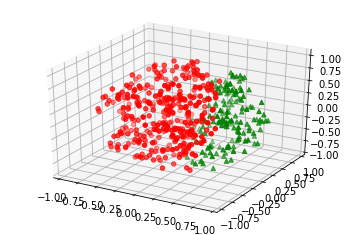

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# 采样个数500
n_samples = 500
dim = 3

# 先生成一组3维正态分布数据，数据方向完全随机
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

# 通过把每个样本到原点距离和均匀分布吻合得到球体内均匀分布的样本
# samples[i] / np.linalg.norm(samples[i]) 归一化  (二范数是向量长度)
# r 一个均匀分布随机数的开3次方
for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])

upper_samples = []
lower_samples = []

for x, y, z in samples:
     # 3x+2y-z=1作为判别平面
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))
        
fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')
uppers = np.array(upper_samples)
lowers = np.array(lower_samples)

# 用不同颜色不同形状的图标表示平面上下的样本
# 判别平面上半部分为红色圆点，下半部分为绿色三角
ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')

plt.show()

In [9]:
x = np.linspace(0, 1, 10)
y = np.linspace(2, 3, 10)
X, Y = np.meshgrid(x, y)
X.shape[1]

10

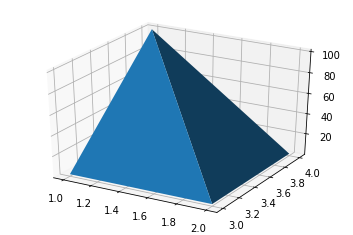

In [5]:
# 展示画一个3d图
import matplotlib.pyplot as plt
# 导入3D 包
from mpl_toolkits.mplot3d import Axes3D

# 将会话框进行对象化
fig = plt.figure()
# 将对话框划分为一个子图, 并指定为3d图
ax = fig.add_subplot(111, projection='3d')

# 定义 x, y, z 三个坐标轴的数据集
U = [1, 1, 2, 2]
V = [3, 4, 4, 3]
W = [1, 100, 1, 1]

# 用函数填满 4个点组成的三角形空间
ax.plot_trisurf(U, V, W)
plt.show()

## 图像显示
Matplotlib也支持图像的存取和显示，并且和OpenCV一类的接口比起来，对于一般的二维矩阵的可视化要方便很多：

这段代码中第一个例子是读取一个本地图片并显示，第二个例子中直接把上小节中反傅里叶变换生成的矩阵作为图像拿过来，原图和经过乘以3再加4变换的图直接绘制了两个形状一样，但是值的范围不一样的图案。显示的时候imshow会自动进行归一化，把最亮的值显示为纯白，最暗的值显示为纯黑。这是一种非常方便的设定，尤其是查看深度学习中某个卷积层的响应图时。得到图像如下：

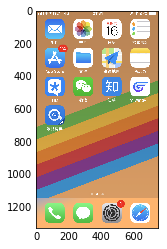

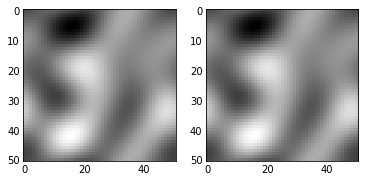

In [8]:
import matplotlib.pyplot as plt

# 读取一张小白狗的照片并显示
plt.figure('A little White iPhone')
little_iPhone_img = plt.imread('iPhone.png')
plt.imshow(little_iPhone_img)

# Z是上小节生成的随机图案，img0就是Z，img1是Z做了个简单的变换
img0 = Z
img1 = 3*Z + 4

# cmap指定为'gray'用来显示灰度图
fig = plt.figure('Auto Normalized Visualization')
ax0 = fig.add_subplot(121)
ax0.imshow(img0, cmap='gray')

ax1 = fig.add_subplot(122)
ax1.imshow(img1, cmap='gray')

plt.show()